In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

## Other
import os, joblib, missingno

## sklearn -- Tiền xử lý, tinh chỉnh và biến đổi dữ liệu
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures,OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.metrics import mean_squared_error

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, SimpleRNN, Conv2D

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
import sys
sys.path.append(r"D:\Capstone project")

In [5]:
import pandas as pd
# Đọc file CSV từ đường dẫn
df = pd.read_csv(r"D:\Capstone project\water_potability.csv")
# Hiển thị thông tin cơ bản
print("Kích thước dữ liệu:", df.shape)
print("\nThông tin dữ liệu:")
print(df.info())
print("\nMẫu dữ liệu:")
df.head()

Kích thước dữ liệu: (3276, 10)

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

Mẫu dữ liệu:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df.shape
df.isna

<bound method DataFrame.isna of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135

Tiền xử lý dữ liệu

In [7]:
df.corr()['Potability'].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64

In [8]:
X = df.drop(columns=['Potability'], axis=1)   ## Features
y = df['Potability']   ## target

Chia tập train/test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

## Kiểm tra kích thước của các tập dữ liệu
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (2784, 9)
y_train shape --  (2784,)
X_test shape --  (492, 9)
y_test shape --  (492,)


Pipeline tiền xử lý dữ liệu cho mô hình 

In [10]:
num_pipeline = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                              ]
                       )
# Xây dựng pipeline xử lý số liệu: fit và transform cho tập train, chỉ transform cho tập test
X_train_num = num_pipeline.fit_transform(X_train)  ## train
X_test_num = num_pipeline.transform(X_test)

In [11]:
import pandas as pd

# Load your dataset
data = pd.read_csv('water_potability.csv')

# Determine the input size (number of features)
input_size = data.shape[1] - 1  # Subtract 1 for the target variable
print("Input size:", input_size)

Input size: 9


In [12]:
# DEBUG: Kiểm tra kích thước trước khi lưu CSV
print("=== DEBUG KÍCH THƯỚC ===")
print(f"X_train_num shape: {X_train_num.shape}")
print(f"X_test_num shape: {X_test_num.shape}")
print(f"y_train type: {type(y_train)}")
print(f"y_test type: {type(y_test)}")

if hasattr(y_train, 'shape'):
    print(f"y_train shape: {y_train.shape}")
else:
    print(f"y_train length: {len(y_train)}")
    
if hasattr(y_test, 'shape'):
    print(f"y_test shape: {y_test.shape}")
else:
    print(f"y_test length: {len(y_test)}")

# Đảm bảo sử dụng dữ liệu từ train_test_split ban đầu
# Nếu bị ghi đè bởi các cell khác, hãy tạo lại
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X, y, test_size=0.15, shuffle=True, random_state=42
)

# Sử dụng pipeline tiền xử lý
X_train_processed = num_pipeline.fit_transform(X_train_original)
X_test_processed = num_pipeline.transform(X_test_original)

print("\n=== KÍCH THƯỚC SAU KHI SỬA ===")
print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")
print(f"y_train_original shape: {y_train_original.shape}")
print(f"y_test_original shape: {y_test_original.shape}")

# In dữ liệu sau tiền xử lý
print("\n=== 5 MẪU TRAIN ĐẦU TIÊN ===")
print("X_train_processed:")
print(X_train_processed[:5])
print("\ny_train_original:")
print(y_train_original[:5])

print("\n=== 5 MẪU TEST ĐẦU TIÊN ===")
print("X_test_processed:")
print(X_test_processed[:5])
print("\ny_test_original:")
print(y_test_original[:5].values)

# Lưu thành CSV
print("\n=== LƯU FILE CSV ===")
import pandas as pd

# Train set
train_df = pd.DataFrame(X_train_processed, columns=X_train_original.columns)
train_df['Potability'] = y_train_original.values
train_df.to_csv(r"D:\Capstone project\train_processed.csv", index=False)

# Test set  
test_df = pd.DataFrame(X_test_processed, columns=X_test_original.columns)
test_df['Potability'] = y_test_original.values
test_df.to_csv(r"D:\Capstone project\test_processed.csv", index=False)

print("✓ train_processed.csv")
print("✓ test_processed.csv")

# Hiển thị thông tin file đã lưu
print(f"\nTrain CSV shape: {train_df.shape}")
print(f"Test CSV shape: {test_df.shape}")
print(f"Train CSV head:\n{train_df.head()}")

=== DEBUG KÍCH THƯỚC ===
X_train_num shape: (2784, 9)
X_test_num shape: (492, 9)
y_train type: <class 'pandas.core.series.Series'>
y_test type: <class 'pandas.core.series.Series'>
y_train shape: (2784,)
y_test shape: (492,)



=== KÍCH THƯỚC SAU KHI SỬA ===
X_train_processed shape: (2784, 9)
X_test_processed shape: (492, 9)
y_train_original shape: (2784,)
y_test_original shape: (492,)

=== 5 MẪU TRAIN ĐẦU TIÊN ===
X_train_processed:
[[ 0.73299714  0.72664063  0.2194817   0.17222627  0.73604793  0.43414742
  -0.2805498   2.32980132  1.26552555]
 [-1.14361998  1.91526722 -1.34888062  1.60340332 -2.35532162 -0.36405404
   0.37413463 -0.03814224  0.03944115]
 [ 0.55789308  0.73108145 -0.86325223  0.58517734 -0.93170668 -1.07556129
   1.26169597  0.03771837  0.16730426]
 [ 1.2105002  -0.17951265 -1.17433888 -0.28336496  1.29449035 -0.49255509
   0.62012077  1.21520617  0.2267222 ]
 [-0.21594948  0.61388205  1.14831931  1.01860322  0.27074857  1.22776498
   1.83819345 -0.37111983  0.49326105]]

y_train_original:
2833    1
1830    0
2800    1
2982    0
2838    1
Name: Potability, dtype: int64

=== 5 MẪU TEST ĐẦU TIÊN ===
X_test_processed:
[[-3.71441699e-02 -4.00031805e-01 -1.79919482e-01  1.40042269e-01
  -1.93319

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, SimpleRNN, Conv1D, Dense, Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split


GRU

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
import numpy as np

# Chuyển đổi dữ liệu thành định dạng phù hợp cho GRU
# GRU yêu cầu đầu vào dạng (batch_size, sequence_length, input_size)
# Vì dữ liệu không có tính chất chuỗi thời gian, ta giả định sequence_length = 1
X_train_rnn = X_train_num.reshape(X_train_num.shape[0], 1, X_train_num.shape[1])  # (samples, 1, features)
X_test_rnn = X_test_num.reshape(X_test_num.shape[0], 1, X_test_num.shape[1])      # (samples, 1, features)

# Chuyển y_train và y_test thành NumPy array (kiểm tra loại dữ liệu trước)
if hasattr(y_train, 'values'):
    y_train_np = y_train.values  # Nếu là pandas Series
else:
    y_train_np = y_train  # Nếu đã là NumPy array

if hasattr(y_test, 'values'):
    y_test_np = y_test.values  # Nếu là pandas Series
else:
    y_test_np = y_test  # Nếu đã là NumPy array

# Chuyển đổi thành tensor của PyTorch
X_train_tensor = torch.tensor(X_train_rnn, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np.reshape(-1, 1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_rnn, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_np.reshape(-1, 1), dtype=torch.float32)

# Định nghĩa mô hình GRU
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])  # Lấy đầu ra của bước thời gian cuối cùng
        return out

# Khởi tạo mô hình
input_size = X_train_num.shape[1]  # Số đặc trưng (9)
hidden_size = 64
output_size = 1  # Dự đoán nhị phân
model = GRUModel(input_size, hidden_size, output_size)

# Định nghĩa hàm mất mát và tối ưu hóa
criterion = nn.BCEWithLogitsLoss()  # Kết hợp sigmoid và binary cross-entropy
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Hàm tính độ chính xác
def calculate_accuracy(outputs, labels):
    preds = (torch.sigmoid(outputs) >= 0.5).float()
    return (preds == labels).float().mean()

# Huấn luyện mô hình
num_epochs = 100
model.train()
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    accuracy = calculate_accuracy(outputs, y_train_tensor)
    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy * 100:.2f}%')

# Đánh giá trên tập kiểm tra
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    y_pred = (torch.sigmoid(outputs) >= 0.5).float().squeeze().numpy()
    y_true = y_test_np
    confusion = confusion_matrix(y_true, y_pred)
    print("\nMa trận nhầm lẫn trên tập kiểm tra:")
    print(confusion)

Epoch [1/100], Loss: 0.6966, Accuracy: 47.27%
Epoch [2/100], Loss: 0.6957, Accuracy: 47.52%
Epoch [3/100], Loss: 0.6947, Accuracy: 49.03%
Epoch [4/100], Loss: 0.6938, Accuracy: 49.39%
Epoch [5/100], Loss: 0.6929, Accuracy: 50.86%
Epoch [6/100], Loss: 0.6921, Accuracy: 51.72%
Epoch [7/100], Loss: 0.6912, Accuracy: 53.81%
Epoch [8/100], Loss: 0.6904, Accuracy: 55.35%
Epoch [9/100], Loss: 0.6895, Accuracy: 57.22%
Epoch [10/100], Loss: 0.6887, Accuracy: 58.33%
Epoch [11/100], Loss: 0.6879, Accuracy: 59.09%
Epoch [12/100], Loss: 0.6871, Accuracy: 59.73%
Epoch [13/100], Loss: 0.6864, Accuracy: 60.24%
Epoch [14/100], Loss: 0.6856, Accuracy: 60.49%
Epoch [15/100], Loss: 0.6849, Accuracy: 60.74%
Epoch [16/100], Loss: 0.6841, Accuracy: 61.03%
Epoch [17/100], Loss: 0.6834, Accuracy: 61.06%
Epoch [18/100], Loss: 0.6827, Accuracy: 61.24%
Epoch [19/100], Loss: 0.6820, Accuracy: 61.24%
Epoch [20/100], Loss: 0.6813, Accuracy: 61.49%
Epoch [21/100], Loss: 0.6806, Accuracy: 61.46%
Epoch [22/100], Loss: 


Đánh giá trên tập kiểm tra:
Accuracy: 0.6463
Precision: 0.8750
Recall: 0.0753
F1-score: 0.1386
Ma trận nhầm lẫn:
[[304   2]
 [172  14]]


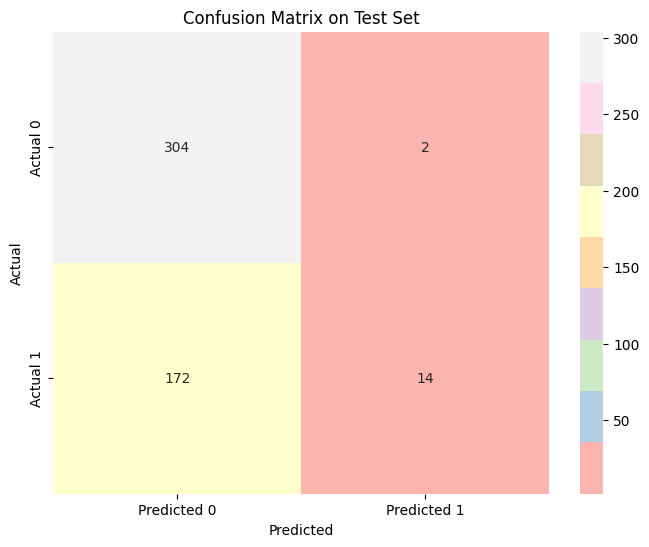

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Đánh giá trên tập kiểm tra
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    y_pred = (torch.sigmoid(outputs) >= 0.5).float().squeeze().numpy()
    y_true = y_test_np

    # Tính các chỉ số
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)

    print("\nĐánh giá trên tập kiểm tra:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Ma trận nhầm lẫn:")
    print(confusion)

# Vẽ heatmap cho ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Pastel1", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Set')
plt.show()

LSTM

In [16]:
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Chuẩn bị dữ liệu 3D cho LSTM (sử dụng dữ liệu đã xử lý)
# Reshape dữ liệu thành định dạng 3D: (samples, timesteps, features)
X_train_3d = X_train_processed.reshape(X_train_processed.shape[0], 1, X_train_processed.shape[1])
X_test_3d = X_test_processed.reshape(X_test_processed.shape[0], 1, X_test_processed.shape[1])

# Định nghĩa input_shape
input_shape = (X_train_3d.shape[1], X_train_3d.shape[2])  # (timesteps, features)

# Định nghĩa early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Xây dựng mô hình LSTM
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')  # Sigmoid cho phân loại nhị phân
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Khởi tạo và huấn luyện mô hình
lstm_model = build_lstm_model(input_shape)

# Huấn luyện mô hình
history_lstm = lstm_model.fit(
    X_train_3d, y_train_original,
    validation_data=(X_test_3d, y_test_original),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Đánh giá mô hình trên tập test
y_pred_lstm = (lstm_model.predict(X_test_3d) >= 0.5).astype(int)
accuracy_lstm = accuracy_score(y_test_original, y_pred_lstm)
precision_lstm = precision_score(y_test_original, y_pred_lstm)
recall_lstm = recall_score(y_test_original, y_pred_lstm)
f1_lstm = f1_score(y_test_original, y_pred_lstm)
confusion_lstm = confusion_matrix(y_test_original, y_pred_lstm)

print("\nĐánh giá mô hình LSTM trên tập kiểm tra:")
print(f"Accuracy: {accuracy_lstm:.4f}")
print(f"Precision: {precision_lstm:.4f}")
print(f"Recall: {recall_lstm:.4f}")
print(f"F1-Score: {f1_lstm:.4f}")
print("Ma trận nhầm lẫn:")
print(confusion_lstm)


Epoch 1/100


c:\Users\pdhoa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5970 - loss: 0.6808 - val_accuracy: 0.6220 - val_loss: 0.6665
Epoch 2/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6078 - loss: 0.6674 - val_accuracy: 0.6220 - val_loss: 0.6557
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6203 - loss: 0.6578 - val_accuracy: 0.6545 - val_loss: 0.6388
Epoch 4/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6466 - loss: 0.6365 - val_accuracy: 0.6809 - val_loss: 0.6111
Epoch 5/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6685 - loss: 0.6218 - val_accuracy: 0.6850 - val_loss: 0.6044
Epoch 6/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6774 - loss: 0.6120 - val_accuracy: 0.6890 - val_loss: 0.6015
Epoch 7/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6774 - loss: 0.6095 - val_accuracy: 0.6809 - val_loss: 0.6007
Epoch 8/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6868 - loss: 0.5975 - val_accuracy: 0.6829 - val_loss: 0.

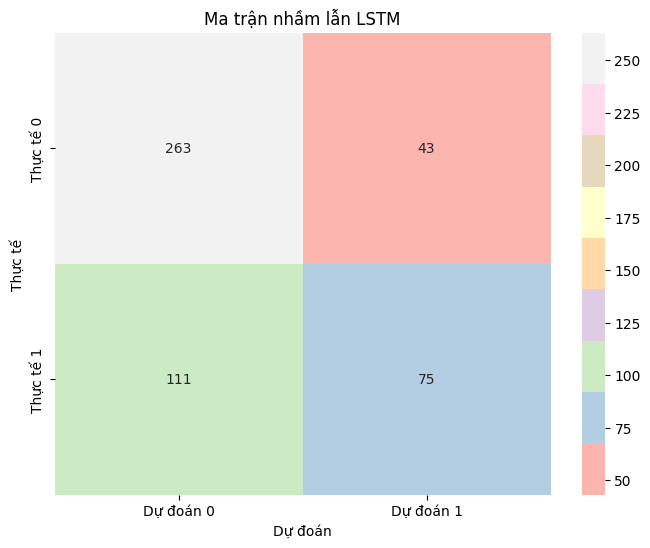

In [17]:

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_lstm, annot=True, fmt="d", cmap="Pastel1", 
            xticklabels=["Dự đoán 0", "Dự đoán 1"], 
            yticklabels=["Thực tế 0", "Thực tế 1"])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn LSTM')
plt.show()

Hybrid GRU+LSTM

Epoch [1/100], Loss: 0.6958, Accuracy: 38.79%
Epoch [2/100], Loss: 0.6947, Accuracy: 38.33%
Epoch [3/100], Loss: 0.6936, Accuracy: 44.04%
Epoch [4/100], Loss: 0.6925, Accuracy: 59.02%
Epoch [5/100], Loss: 0.6915, Accuracy: 61.14%
Epoch [6/100], Loss: 0.6905, Accuracy: 60.81%
Epoch [7/100], Loss: 0.6895, Accuracy: 60.78%
Epoch [8/100], Loss: 0.6886, Accuracy: 60.78%
Epoch [9/100], Loss: 0.6876, Accuracy: 60.78%
Epoch [10/100], Loss: 0.6867, Accuracy: 60.78%
Epoch [11/100], Loss: 0.6858, Accuracy: 60.78%
Epoch [12/100], Loss: 0.6849, Accuracy: 60.78%
Epoch [13/100], Loss: 0.6840, Accuracy: 60.78%
Epoch [14/100], Loss: 0.6831, Accuracy: 60.78%
Epoch [15/100], Loss: 0.6822, Accuracy: 60.78%
Epoch [16/100], Loss: 0.6814, Accuracy: 60.78%
Epoch [17/100], Loss: 0.6805, Accuracy: 60.78%
Epoch [18/100], Loss: 0.6797, Accuracy: 60.78%
Epoch [19/100], Loss: 0.6788, Accuracy: 60.78%
Epoch [20/100], Loss: 0.6780, Accuracy: 60.78%
Epoch [21/100], Loss: 0.6771, Accuracy: 60.78%
Epoch [22/100], Loss: 

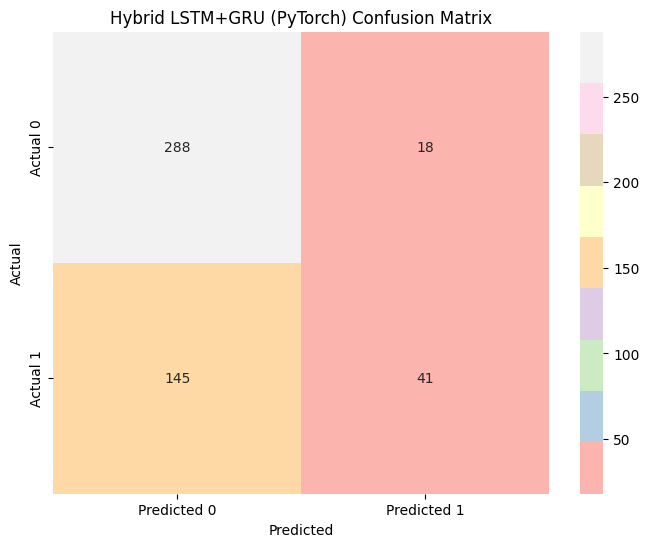

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

# Chuyển đổi dữ liệu thành tensor và định dạng 3D
X_train_tensor = torch.FloatTensor(X_train_processed[:, np.newaxis, :])  # [2784, 1, 9]
y_train_tensor = torch.FloatTensor(y_train_original.values).reshape(-1, 1)  # [2784, 1]
X_test_tensor = torch.FloatTensor(X_test_processed[:, np.newaxis, :])  # [492, 1, 9]
y_test_tensor = torch.FloatTensor(y_test_original.values).reshape(-1, 1)  # [492, 1]

# Định nghĩa mô hình kết hợp LSTM+GRU
class HybridModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(HybridModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out_lstm, _ = self.lstm(x)
        out_gru, _ = self.gru(out_lstm)
        out = self.fc(out_gru[:, -1, :])
        return out

# Khởi tạo mô hình
input_size = 9  # Số đặc trưng
hidden_size = 64
output_size = 1
model = HybridModel(input_size, hidden_size, output_size)

# Hàm tính accuracy
def calculate_accuracy(outputs, labels):
    preds = (torch.sigmoid(outputs) >= 0.5).float()
    return torch.mean((preds == labels).float()).item()

# Định nghĩa hàm mất mát và optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    accuracy = calculate_accuracy(outputs, y_train_tensor)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy * 100:.2f}%')

# Đánh giá trên tập test
model.eval()
with torch.no_grad():
    outputs_test = model(X_test_tensor)
    y_pred_hybrid_pytorch = (torch.sigmoid(outputs_test) >= 0.5).float().numpy()
    y_true_test = y_test_tensor.numpy()
    
    accuracy_hybrid_pytorch = accuracy_score(y_true_test, y_pred_hybrid_pytorch)
    precision_hybrid_pytorch = precision_score(y_true_test, y_pred_hybrid_pytorch)
    recall_hybrid_pytorch = recall_score(y_true_test, y_pred_hybrid_pytorch)
    f1_hybrid_pytorch = f1_score(y_true_test, y_pred_hybrid_pytorch)
    confusion_hybrid_pytorch = confusion_matrix(y_true_test, y_pred_hybrid_pytorch)

print("\nHybrid LSTM+GRU (PyTorch) Model Evaluation on Test Set:")
print(f"Accuracy: {accuracy_hybrid_pytorch:.4f}")
print(f"Precision: {precision_hybrid_pytorch:.4f}")
print(f"Recall: {recall_hybrid_pytorch:.4f}")
print(f"F1-Score: {f1_hybrid_pytorch:.4f}")
print("Confusion Matrix:")
print(confusion_hybrid_pytorch)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_hybrid_pytorch, annot=True, fmt="d", cmap="Pastel1", 
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Hybrid LSTM+GRU (PyTorch) Confusion Matrix')
plt.show()

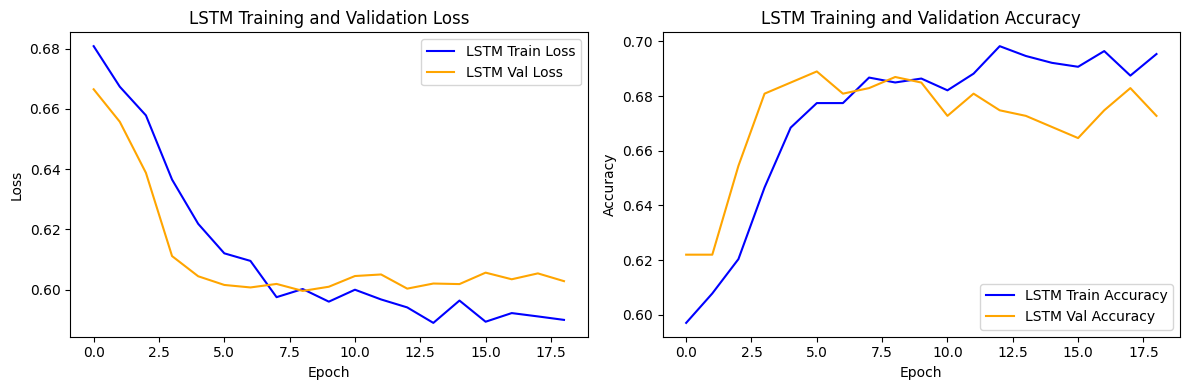


SO SÁNH CÁC MÔ HÌNH TRÊN TẬP KIỂM TRA
Metric       |   GRU (PyTorch) |    LSTM (Keras) |  Hybrid (PyTorch)
---------------------------------------------------------------------------
Accuracy     |          0.6616 |          0.6870 |            0.6687
Precision    |          0.8750 |          0.6356 |            0.6949
Recall       |          0.0753 |          0.4032 |            0.2204
F1-Score     |          0.1386 |          0.4934 |            0.3347

KẾT LUẬN
Mô hình tốt nhất theo Accuracy: LSTM (Keras) (0.6870)
Mô hình tốt nhất theo F1-Score: LSTM (Keras) (0.4934)


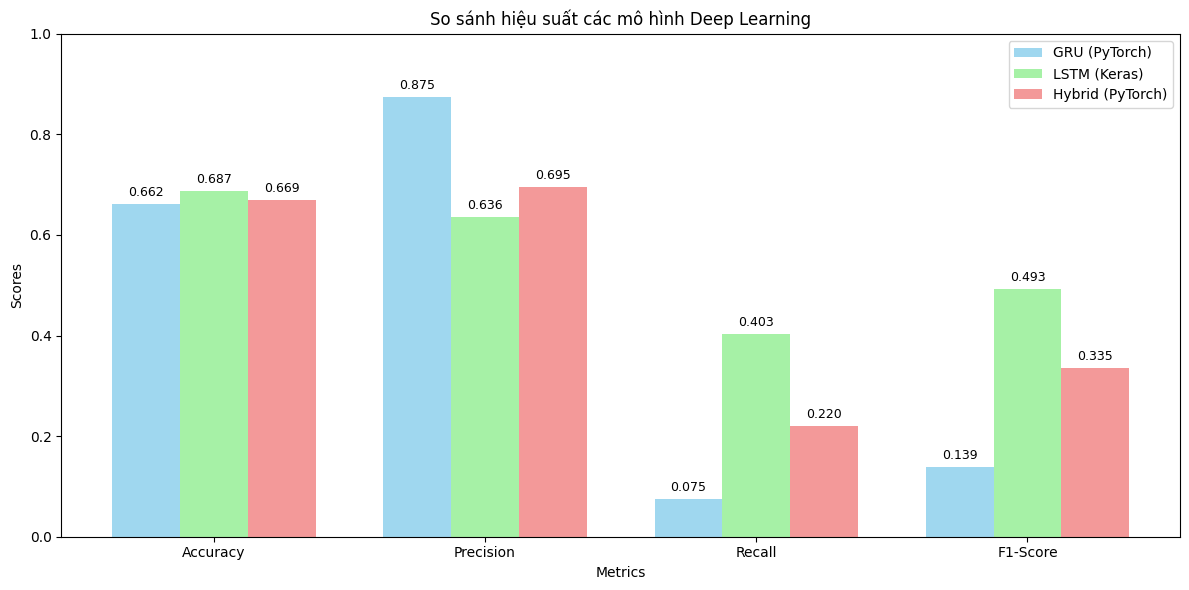

In [22]:
# Vẽ biểu đồ lịch sử huấn luyện (chỉ cho LSTM Keras)
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='LSTM Train Loss', color='blue')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss', color='orange')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'], label='LSTM Train Accuracy', color='blue')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Val Accuracy', color='orange')
plt.title('LSTM Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Lấy các metrics đã tính toán từ GRU PyTorch (từ cell trước)
accuracy_gru = accuracy  # từ GRU PyTorch
precision_gru = precision
recall_gru = recall
f1_gru = f1

# Lấy metrics từ Hybrid PyTorch
accuracy_hybrid = accuracy_hybrid_pytorch
precision_hybrid = precision_hybrid_pytorch
recall_hybrid = recall_hybrid_pytorch
f1_hybrid = f1_hybrid_pytorch

# Bảng so sánh các mô hình
print("\n" + "="*60)
print("SO SÁNH CÁC MÔ HÌNH TRÊN TẬP KIỂM TRA")
print("="*60)
print(f"{'Metric':<12} | {'GRU (PyTorch)':>15} | {'LSTM (Keras)':>15} | {'Hybrid (PyTorch)':>17}")
print("-" * 75)
print(f"{'Accuracy':<12} | {accuracy_gru:>15.4f} | {accuracy_lstm:>15.4f} | {accuracy_hybrid:>17.4f}")
print(f"{'Precision':<12} | {precision_gru:>15.4f} | {precision_lstm:>15.4f} | {precision_hybrid:>17.4f}")
print(f"{'Recall':<12} | {recall_gru:>15.4f} | {recall_lstm:>15.4f} | {recall_hybrid:>17.4f}")
print(f"{'F1-Score':<12} | {f1_gru:>15.4f} | {f1_lstm:>15.4f} | {f1_hybrid:>17.4f}")

# Tìm mô hình tốt nhất
models_performance = {
    'GRU (PyTorch)': {'accuracy': accuracy_gru, 'f1': f1_gru},
    'LSTM (Keras)': {'accuracy': accuracy_lstm, 'f1': f1_lstm},
    'Hybrid (PyTorch)': {'accuracy': accuracy_hybrid, 'f1': f1_hybrid}
}

best_model_accuracy = max(models_performance.items(), key=lambda x: x[1]['accuracy'])
best_model_f1 = max(models_performance.items(), key=lambda x: x[1]['f1'])

print("\n" + "="*60)
print("KẾT LUẬN")
print("="*60)
print(f"Mô hình tốt nhất theo Accuracy: {best_model_accuracy[0]} ({best_model_accuracy[1]['accuracy']:.4f})")
print(f"Mô hình tốt nhất theo F1-Score: {best_model_f1[0]} ({best_model_f1[1]['f1']:.4f})")

# Vẽ biểu đồ so sánh các metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
gru_scores = [accuracy_gru, precision_gru, recall_gru, f1_gru]
lstm_scores = [accuracy_lstm, precision_lstm, recall_lstm, f1_lstm]
hybrid_scores = [accuracy_hybrid, precision_hybrid, recall_hybrid, f1_hybrid]

x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width, gru_scores, width, label='GRU (PyTorch)', alpha=0.8, color='skyblue')
bars2 = ax.bar(x, lstm_scores, width, label='LSTM (Keras)', alpha=0.8, color='lightgreen')
bars3 = ax.bar(x + width, hybrid_scores, width, label='Hybrid (PyTorch)', alpha=0.8, color='lightcoral')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('So sánh hiệu suất các mô hình Deep Learning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)

# Thêm giá trị lên các cột
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

plt.tight_layout()
plt.show()

Đánh giá